In [11]:
import numpy as np
import pandas as pd 
from scipy import signal, interpolate
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

In [7]:
p = Path.home() / "projects" / "critchley_depersonalisation"

In [5]:
p / "../results/physio_measures/sub-10155/sub-10155_task-heartbeat_run-1_desc-continuousHRV_physio.tsv

<generator object Path.iterdir at 0x7fd79b50fd50>

In [8]:
spwvd_hrv = pd.read_csv(p / "results" / "physio_measures" / "sub-10155" / "sub-10155_task-heartbeat_run-1_desc-continuousHRV_physio.tsv", 
                        sep="\t", index_col=0)
ibi = pd.read_csv(p / "results" / "physio_measures" / "sub-10155" / "sub-10155_task-heartbeat_run-1_desc-ibi_physio.tsv", sep="\t")

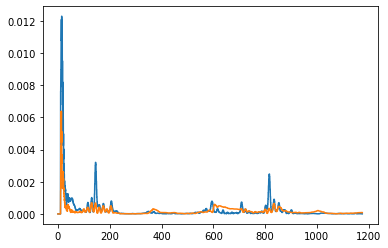

In [9]:
plt.plot(spwvd_hrv)

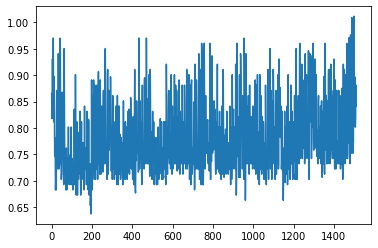

In [10]:
plt.plot(ibi)

In [17]:
ibi.to_numpy().T

array([[0.86526087, 0.81774082, 0.82170082, ..., 0.82170082, 0.88110088,
        0.84150084]])

In [45]:
fsResamp = 4   
tmStamps = np.cumsum(ibi.to_numpy()) #in seconds 
f = interpolate.interp1d(tmStamps, np.squeeze(ibi.to_numpy()), 'cubic')
tmInterp = np.arange(tmStamps[0], tmStamps[-1], 1/fsResamp)
RRinterp = f(tmInterp)          

#Remove DC component     
RRseries = RRinterp - np.mean(RRinterp)

#Pwelch w/ zero pad     
fxx, pxx = signal.welch(RRseries.T, fsResamp, nfft = 2**14, window = 'hann')    

In [38]:
vlf= (0.003, 0.04)
lf = (0.04, 0.15)
hf = (0.15, 0.4)

df = fxx[1] - fxx[0]
vlf_power = np.trapz(pxx[np.logical_and(fxx >= vlf[0], fxx < vlf[1])], dx = df)      
lf_power = np.trapz(pxx[np.logical_and(fxx >= lf[0], fxx < lf[1])], dx = df)
hf_power = np.trapz(pxx[np.logical_and(fxx >= hf[0], fxx < hf[1])], dx = df)

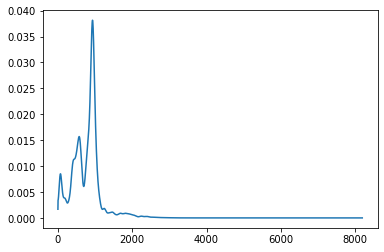

In [47]:
plt.plot(pxx)